## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
import numpy as np                              # Import all the libraries required for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive                 # Mount the Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Hotel Booking Analysis - Tito Varghese/Hotel Bookings.csv')   # Syntax to read the csv file
                                                                        # df is the Dataframe name given to our dataset

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.shape

(119390, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# **Data Cleaning**

##  a) **Checking for data type**

In [7]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [8]:
df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'], format = '%Y-%m-%d') #change the datatype of reservation status date to datetime

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

## b) **Checking for missing values**

In [10]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

The following coulmns name company , agent , country  , children has null values in it.

## c) **Handling the null values**

In [11]:
df.drop(['company','agent'],axis=1, inplace= True) # drop AgentId and CompanyId Columns
df['country'].fillna('Not defined',inplace = True) # we use Not defined here because country is a object data type
df['children'].fillna(0 , inplace = True)

df.shape

(119390, 30)

In [12]:
df.isna().sum()      # checking again to see whether all null values are filled or not

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

## d) **Check for duplicate value rows**

In [13]:
df.duplicated().value_counts()

False    87370
True     32020
dtype: int64

We can see from above data that we have 31994 rows with duplicate values.We will remove duplicate values now

In [14]:
df.drop_duplicates(inplace=True)    # syntax to remove duplicate values

In [15]:
df.duplicated().value_counts()      # Hence we have removed all the duplicate values from the row

False    87370
dtype: int64

In [16]:
df.shape

(87370, 30)



```
# This is formatted as code
```

## **e) Check for Outliers**

## **1. Removing Outlier from adr data**

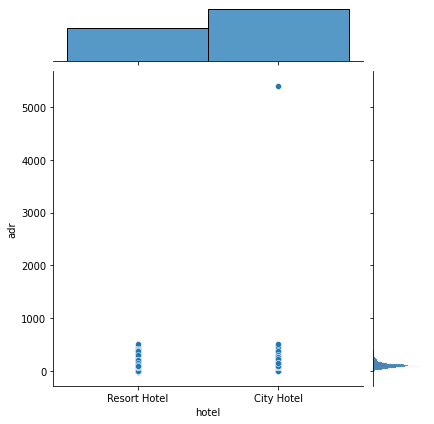

In [17]:
sns.jointplot(x='hotel', y='adr', data= df)

We have found an outlier in adr data,hence we will try to remove it inorder to do a better data analysis process.

In [18]:
df.drop(df[df['adr'] > 5000].index, inplace = True)   #Removing outliers from the adr data

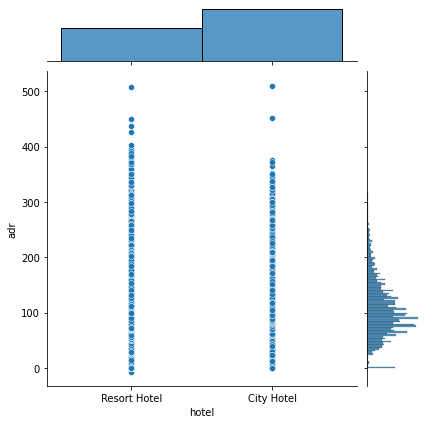

In [19]:
sns.jointplot(x='hotel', y='adr', data= df)

#2. Removing Outlier from lead time data**

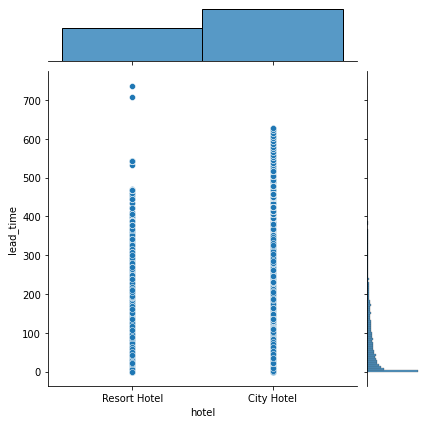

In [20]:
sns.jointplot(x='hotel', y='lead_time', data= df)

We have found some outliers above 650 range in Resort Hotel ,we will drop them for better data analysis

In [21]:
df.drop(df[df['lead_time']> 650].index,inplace=True)                  #Removing outliers from the lead time data

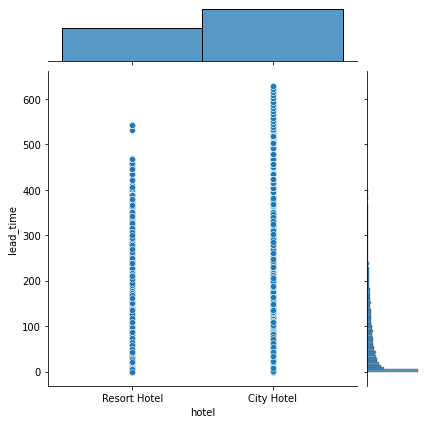

In [22]:
sns.jointplot(x='hotel', y='lead_time', data= df)

## **3.Removing Outlier from days in waiting list  data**

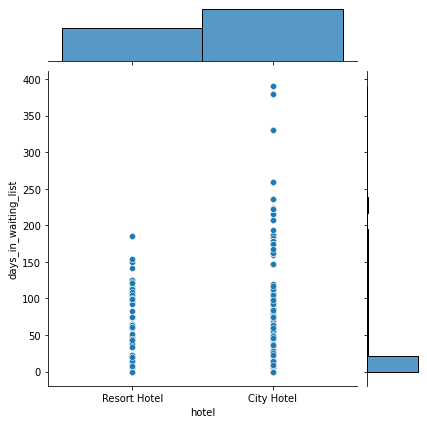

In [23]:
sns.jointplot(x='hotel', y='days_in_waiting_list', data= df)

We have found some outliers above 300 range in City Hotel ,we will drop them for better data analysis

In [24]:
df.drop(df[df['days_in_waiting_list']> 300].index,inplace=True)        #Removing outliers from the days_in_waiting_list column 

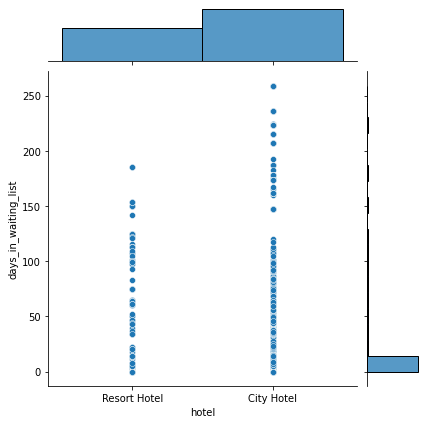

In [25]:
sns.jointplot(x='hotel', y='days_in_waiting_list', data= df)

## **4.Removing Outlier from Car parking space  data**

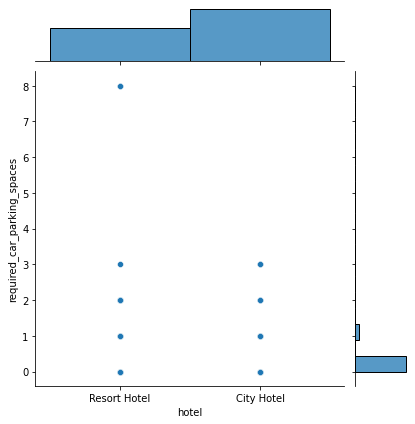

In [26]:
sns.jointplot(x='hotel', y='required_car_parking_spaces', data= df)

In [28]:
df.drop(df[df['required_car_parking_spaces']> 5].index,inplace=True)       #Removing outliers from the car parking space data

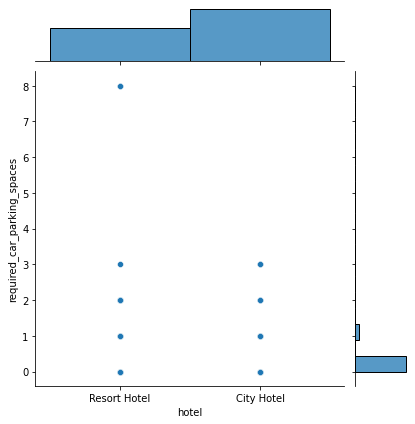

In [27]:
sns.jointplot(x='hotel', y='required_car_parking_spaces', data= df)

In [29]:
df.shape

(87353, 30)

## **Exploratory Data Analysis**

# **Question No-1**
## **Factor affecting Cancellation rate** 

##  **Distribution Channel with highest cancellation**

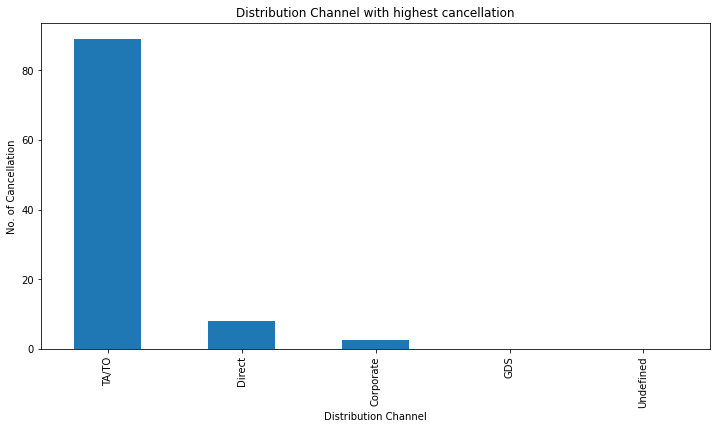

In [30]:
cond = df[df['is_canceled']==1]
channel =  (cond['distribution_channel'].value_counts()/cond['distribution_channel'].size)*100
plt.rcParams['figure.figsize'] = (12,6)
channel.plot(kind = 'bar')
plt.title('Distribution Channel with highest cancellation')
plt.ylabel('No. of Cancellation')
plt.xlabel('Distribution Channel')
plt.show()

## **a) Waiting time(days)**

In [31]:
waiting_list= df[df['days_in_waiting_list'] !=0]  # Selecting bookings with non zero waiting time




In [32]:
waiting_list.shape

(847, 30)

In [33]:
cancellation = (waiting_list.groupby('is_canceled')['days_in_waiting_list'].count()/ waiting_list['days_in_waiting_list'].size)*100
cancellation


is_canceled
0    66.115702
1    33.884298
Name: days_in_waiting_list, dtype: float64

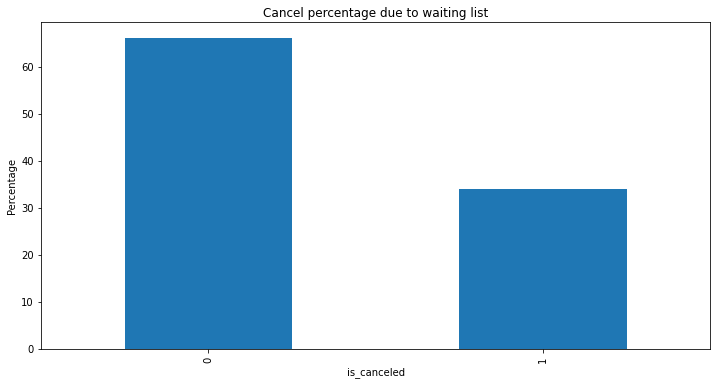

In [34]:
plt.rcParams['figure.figsize'] = (12,6)
cancellation.plot(kind = 'bar')
plt.title('Cancel percentage due to waiting list')
plt.ylabel('Percentage')
plt.xlabel('is_canceled')
plt.show()

### **Result**
The above bar plot tells you that the percentage of bookings canceled due to longer waiting time is compartively low. Even if there is waiting time for booking , around 65% of booking not canceled,therefore we can conclude that waiting period has no effect on cancellation of bookings

## **b) Lead Time**

In [35]:
cancellation1 = (df.groupby('is_canceled')['lead_time'].count()/df['lead_time'].size)*100
cancellation1

is_canceled
0    72.510389
1    27.489611
Name: lead_time, dtype: float64

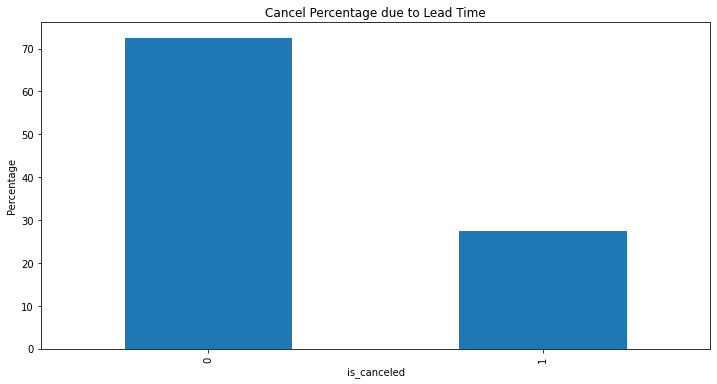

In [36]:
plt.rcParams['figure.figsize'] = (12,6)
cancellation1.plot(kind = 'bar')
plt.title('Cancel Percentage due to Lead Time')
plt.ylabel('Percentage')
plt.xlabel('is_canceled')
plt.show()

### **Result**
The above bar plot tells you that the percentage of bookings canceled due to lead time is compartively very low. Nearly 72% of booking not canceled,therefore we can conclude that Lead Time has no effect on cancellation of bookings

## c)**Whether not getting allotted the same room type as demanded is the cause of cancellation fo bookings**

In [37]:
def room(x):
  if x['assigned_room_type'] != x['reserved_room_type']:
    return 1
  else:
    return 0


In [38]:
df['allotted_same_room'] = df.apply(lambda x : room(x) ,axis=1)

In [39]:
room = (df.groupby('is_canceled')['allotted_same_room'].sum()/df['is_canceled'].size)*100
room


is_canceled
0    14.291438
1     0.705185
Name: allotted_same_room, dtype: float64

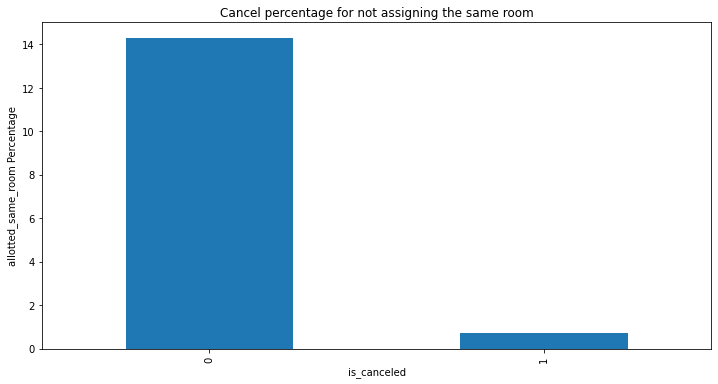

In [40]:
plt.rcParams['figure.figsize'] = (12,6)
room.plot(kind = 'bar')
plt.title('Cancel percentage for not assigning the same room')
plt.ylabel('allotted_same_room Percentage')
plt.xlabel('is_canceled')
plt.show()

# **Result**
The above bar plot tells you that the percentage of bookings canceled due to not assigning same room is compartively very low. There were no significant number of booking  canceled due to not allocating the same room . Therefore we can conclude that not assigning the same room has no effect on cancellation of bookings

## **d) Car parking space**

In [41]:
new_df1 = df[df['is_canceled'] == 1]            #segregation of actual canceled data from is_canceled column
new_df1['is_canceled'].value_counts()

1    24013
Name: is_canceled, dtype: int64

Text(0.5, 1.0, 'The number of bookings vs car parking space available')

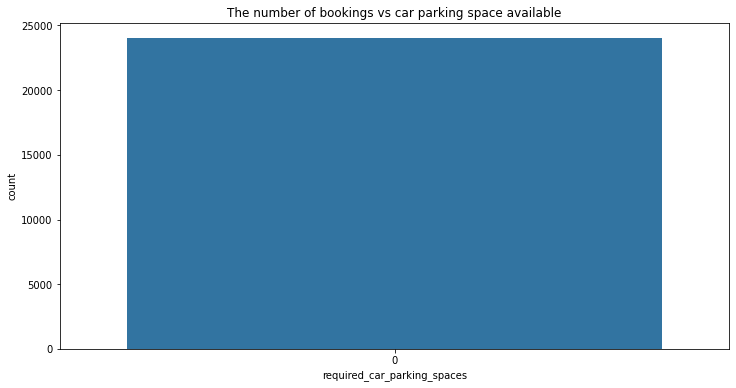

In [42]:
sns.countplot(x='required_car_parking_spaces',data = new_df1)
plt.title('The number of bookings vs car parking space available')

### **Result** 
When we have gone through analysis of actual canceled data analysis(new_df1),we find that the required_car_space column name has only value 0 in its entire rows.All the canceled booking has assigned zero parking space,not a single car parking space alloted in the booking. Hence we can conclude from this analysis that one prime reason behind cancellation will be due to no car parking space.